## Simple Setup

In [61]:
from fastai import *
from fastai.vision.all import *

In [62]:
def f(x): return x**2

In [63]:
xt = tensor(4.).requires_grad_()

xt

tensor(4., requires_grad=True)

In [64]:
yt = f(xt)

yt

tensor(16., grad_fn=<PowBackward0>)

In [65]:
yt.backward()

In [66]:
xt.grad

tensor(8.)

## Complex example

### Setup

In [67]:
time = torch.arange(0, 20).float()

time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

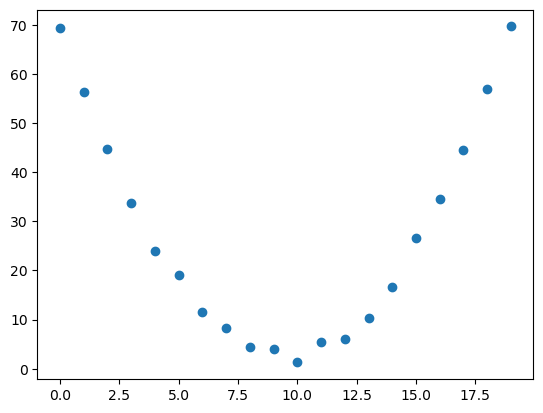

In [68]:
# it only works because torch.rand(20) and time both are RANK 1 tensors with 20 items
speed = torch.rand(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [69]:
speed

tensor([69.3369, 56.2763, 44.7336, 33.7098, 23.9612, 19.0451, 11.5751,  8.3630,
         4.4965,  4.0690,  1.2686,  5.4038,  5.9587, 10.3137, 16.6876, 26.6592,
        34.4850, 44.4444, 57.0074, 69.6846])

In [70]:
def f(t, params):
    """
    t - value on axis Y
    params - a,b,c parameters of the function
    """
    a,b,c = params
    return a*(t**2) + (b*t) + c

### Define loss function (Mean Square Error)

In [71]:
def mse(preds, target):
    """
    preds and target are vectors
    .mean() returns single value for those vectors
    """
    return ((preds - target)**2).mean().sqrt()

### Init parameters

In [72]:
# create random a b and c
params = torch.randn(3).requires_grad_()

params

tensor([ 0.6017,  1.4833, -1.2076], requires_grad=True)

### Compute predicted values
pass `params` to the function `f`. For each value in `time` series compute the function  using passed parameters `a`, `b`, `c`

In [73]:
preds = f(time, params)

preds

tensor([ -1.2076,   0.8775,   4.1659,   8.6578,  14.3531,  21.2519,  29.3540,
         38.6596,  49.1686,  60.8810,  73.7968,  87.9161, 103.2388, 119.7649,
        137.4944, 156.4273, 176.5637, 197.9035, 220.4467, 244.1933],
       grad_fn=<AddBackward0>)

### Plot predcitions and compare with actual values

actual value plotted in `blue`

predictions plotted in `red`

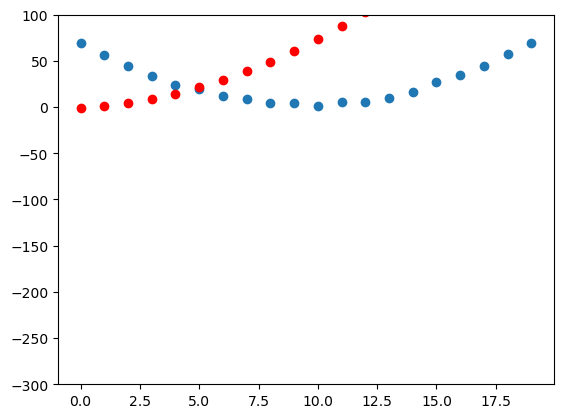

In [74]:
def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]

    ax.scatter(time, speed)
    # to_np -> convert PyTorch tensor to numpy array
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

show_preds(preds)

### Calculate the loss using `mse`

`loss` represents the distance between the actual value and the predicted value. That's why we want to minimize the loss.
When `loss` is calculated we can compute gradient for function with params a,b,c.

In [75]:
loss = mse(preds, speed)

loss

tensor(95.5826, grad_fn=<SqrtBackward0>)

In [76]:
loss.backward()

params.grad

tensor([161.2929,  10.4354,   0.6259])

### Based on the calculated loss and gradients, change the params (weight assignment)

In [86]:
lr = 1e-4
lr

params

tensor([ 0.7525,  1.4869, -1.2009], requires_grad=True)

In [78]:
params.data -= lr * params.grad.data
# remove the calculated gradients because we need to calculate them again
params.grad = None

In [79]:
preds_v2 = f(time, params)
mse(preds_v2, speed)

tensor(95.3214, grad_fn=<SqrtBackward0>)

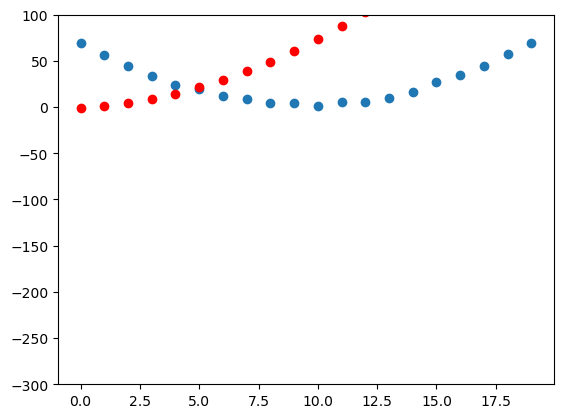

In [80]:
show_preds(preds_v2)

In [87]:
def learn(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [88]:
for i in range(10): learn(params)

120.14730072021484
117.45831298828125
114.77567291259766
112.09979248046875
109.43116760253906
106.7702865600586
104.11773681640625
101.4741439819336
98.8401870727539
96.21659851074219
